In [4]:
!pip install kaggle
!kaggle competitions download -c m5-forecasting-accuracy

 90%|██████████████████████████████████    | 41.0M/45.8M [00:00<00:00, 66.2MB/s]
100%|██████████████████████████████████████| 45.8M/45.8M [00:00<00:00, 58.4MB/s]


In [35]:
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

In [56]:
calendar = pd.read_csv('datasets/m5/calendar.csv')
train_size = 1941
dates = pd.to_datetime(calendar['date'])[:train_size]

In [50]:
df = pd.read_csv('datasets/m5/sales_train_evaluation.csv')

In [51]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [60]:
two_stores = (df
 .loc[df['id'].isin(['FOODS_3_823_CA_1_evaluation', 'FOODS_3_823_CA_2_evaluation'])]
 .iloc[:, 6:]
 .T
 .reset_index(drop=True)
 .set_index(dates)
)

two_stores

,3044,6093
date,,
2011-01-29,0,0
2011-01-30,0,0
2011-01-31,0,0
2011-02-01,0,0
2011-02-02,0,0
...,...,...
2016-05-18,2,1
2016-05-19,4,2
2016-05-20,3,7


array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

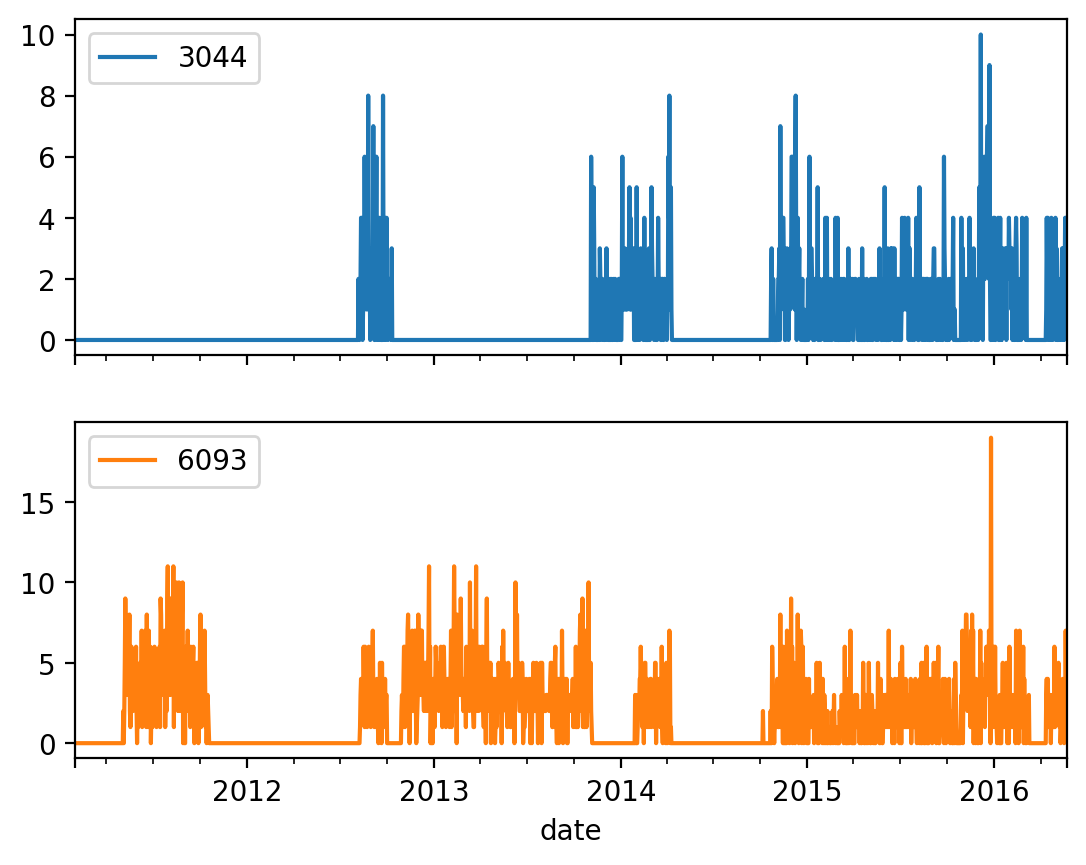

In [61]:
two_stores.plot(subplots=True)